## Table of content

1. Introduction
2. Goal
3. Import Datset & libraries
4. Overview
5. Data Pre-processing
6. Statistical Techniques
7. Descriptive Statistical Analyses
8.  Hypothesis Formulation and Testing
9.  Jupyter Notebook Analysis
10. Machine Leaning 
11. Splitting
12. Training and Testing
13. Conclusions
14. References
15. GitHub repo link

### Import Datset & libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [2]:
# read the two pages of the excel file
full_path = "data/data.xlsx"
df_1  = pd.read_excel(full_path, 0)
df_2  = pd.read_excel(full_path, 1)
# print the shape of the two dataframes
print(df_1.shape, df_2.shape)

(525461, 8) (541910, 8)


In [3]:
# create the full dataframe
df = pd.concat([df_1, df_2], axis=0)

### Data Exploration and Preparation

In [4]:
print("Our Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))
display(df.describe())
display(df.head())
display(df.dtypes.value_counts())

Our Dataset has 1067371 rows and 8 columns


,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


object            4
float64           2
int64             1
datetime64[ns]    1
Name: count, dtype: int64

In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
# Preprocessing
# Convert 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [7]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
# check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


We have missing Description and Customer ID. For now is not strictly necessary to drop them since the variables on which we want to apply clustering have not been decided.

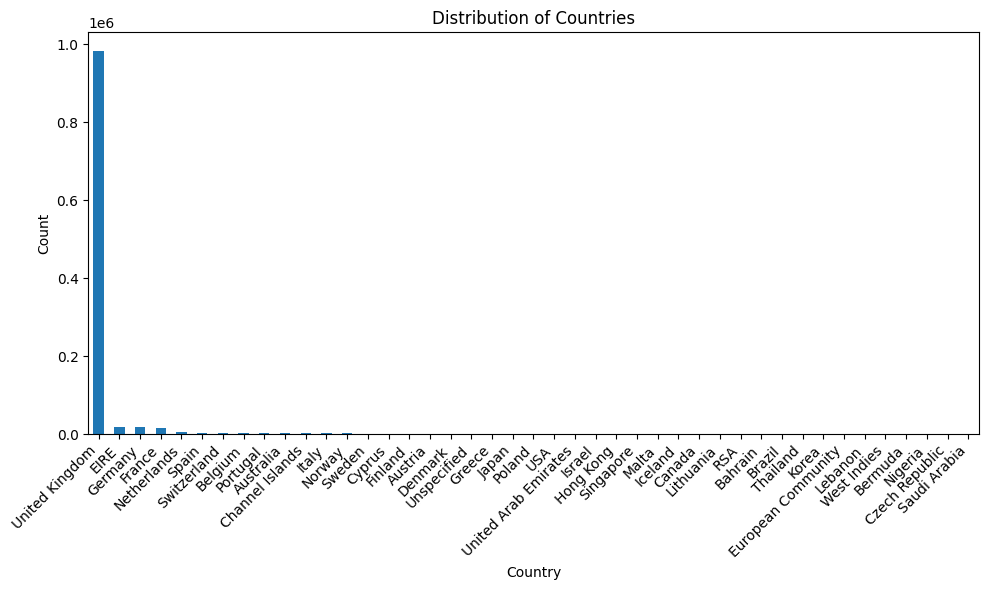

In [9]:
# let's check on which country the most of the customers are from
country_counts = df['Country'].value_counts()

# Plot the distribution of countries
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.title('Distribution of Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Most of the Transaction are from United Kingdom.

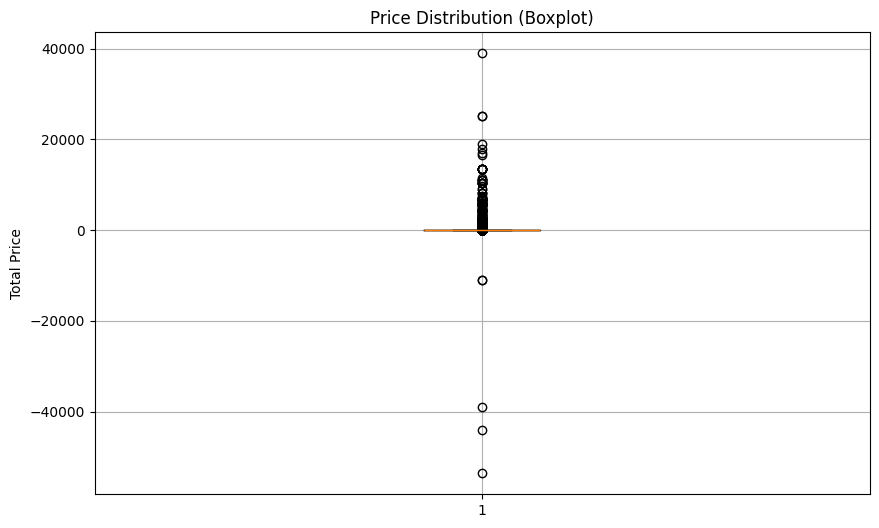

In [10]:
# Let's check the rprice distribution
plt.figure(figsize=(10, 6))
plt.boxplot(df['Price'])
plt.title('Price Distribution (Boxplot)')
plt.ylabel('Total Price')
plt.grid(True)
plt.show()

It seems we have negative prices on the dataset. Let's check the desctiption for these transactions.

In [11]:
df_neg_price = df[df['Price'] < 0]

In [12]:
print(f"We have n: {len(df_neg_price)} negative transactions")

We have n: 5 negative transactions


In [13]:
df_neg_price

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Since we have only 5 transactions with negative prices, we can drop them.

In [14]:
df = df[df['Price'] > 0]

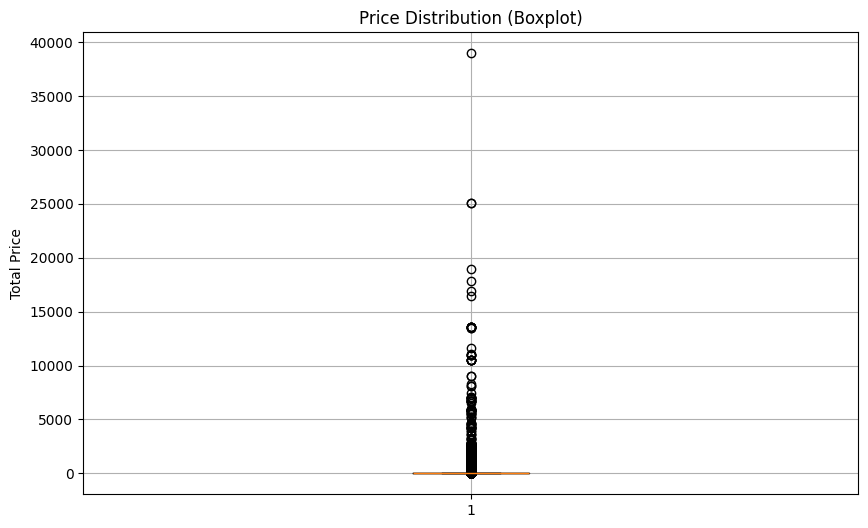

In [15]:
# let's plot now the price distribution
plt.figure(figsize=(10, 6))
plt.boxplot(df['Price'])
plt.title('Price Distribution (Boxplot)')
plt.ylabel('Total Price')
plt.grid(True)
plt.show()

In [17]:
# let's check if to an invoice correspond more than one country
invoice_cust = df.groupby('Invoice')['Customer ID'].nunique()
invoice_cust[invoice_cust > 1]

Series([], Name: Customer ID, dtype: int64)

In [18]:
# let's check if to an invoice correspond only one country
invoice_country = df.groupby('Invoice')['Country'].nunique()
invoice_country[invoice_country > 1]

Series([], Name: Country, dtype: int64)

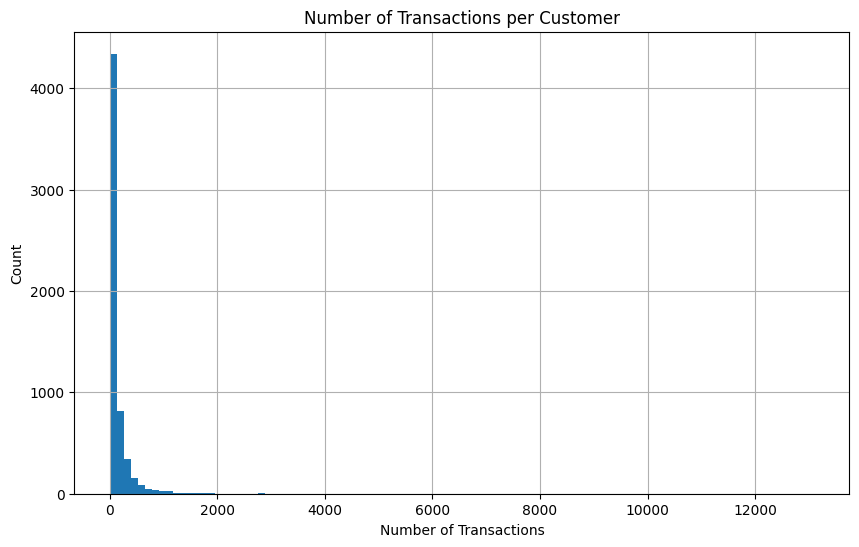

In [19]:
# Let's check the number of transactions per customer and plot it
customer_transactions = df['Customer ID'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(customer_transactions, bins=100)
plt.title('Number of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [20]:
# let's enumerate the country column so we can use it in the clustering
df['Country'] = df['Country'].astype('category').cat.codes

In [21]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,40
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,40
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,40
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,40
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,14
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,14
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,14
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,14


In [22]:
# let's add a column containing the total price for a stock code and quantity
df['TotalPrice'] = df['Quantity'] * df['Price']

In [23]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,40,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,40,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,40,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,40,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,40,30.0


Let's preprocess the dataset by grouping the data by InvoiceNo so that every row will correspond to a single transaction. we will add the number of items purchased in each transaction as a new column as well as the total price of the transaction.

In [24]:
# Group the dataframe by 'Invoice' and calculate total price, total items, and country
invoice_summary = df.groupby('Invoice').agg({
    'TotalPrice': 'sum',            
    'Quantity': 'sum',       
}).reset_index()

print(invoice_summary.head())

  Invoice  TotalPrice  Quantity
0  489434      505.30       166
1  489435      145.80        60
2  489436      630.33       193
3  489437      310.75       145
4  489438     2286.24       826


Some clustering algorithms such as k-means are sensitive to the scale of the data. Therefore, we will scale the data before.

In [25]:
# scale the data using standard scaler
scaler = StandardScaler()
invoice_summary_scaled = scaler.fit_transform(invoice_summary[['TotalPrice', 'Quantity']])
# add back the invoice
invoice_summary_scaled = np.concatenate([invoice_summary[['Invoice']].values, invoice_summary_scaled], axis=1)
invoice_summary_scaled = pd.DataFrame(invoice_summary_scaled, columns=['Invoice', 'TotalPrice', 'Quantity'])

In [26]:
len(invoice_summary_scaled)

48369

## Clustering

- we will use k-means, k-medoids, and DBSCAN to cluster the data
- we will use the silhouette score to find the best number of clusters for k-means and k-medoids
- we will compare the clustering techniques using the silhouette score

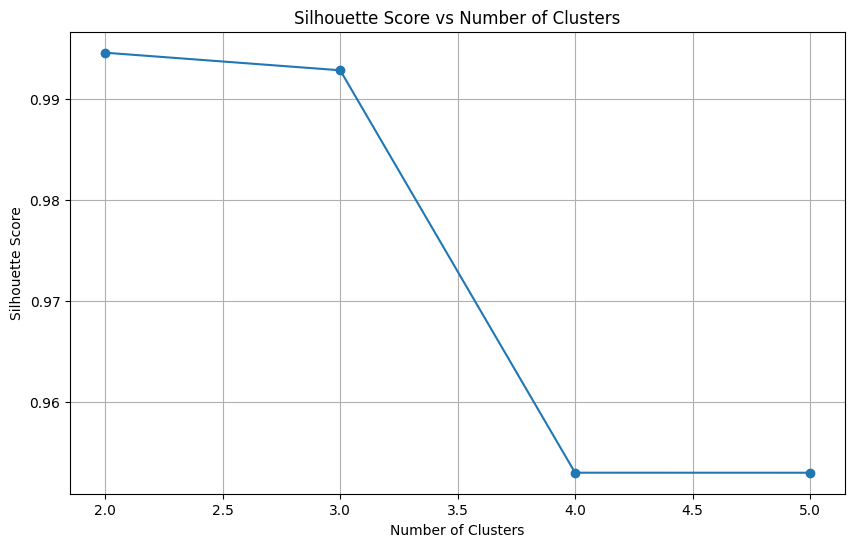

In [27]:
# we will use k-means, k-medoids, DBSCAN to cluster the data
# we will use the silhouette score to find the best number of clusters for k-means and k-medoids
# we will compare the clustering techniques using the silhouette score

# K-means
silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(invoice_summary_scaled[['TotalPrice', 'Quantity']])
    silhouette_scores.append(silhouette_score(invoice_summary_scaled[['TotalPrice', 'Quantity']], kmeans.labels_))
    
plt.figure(figsize=(10, 6))
plt.plot(range(2, 6), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

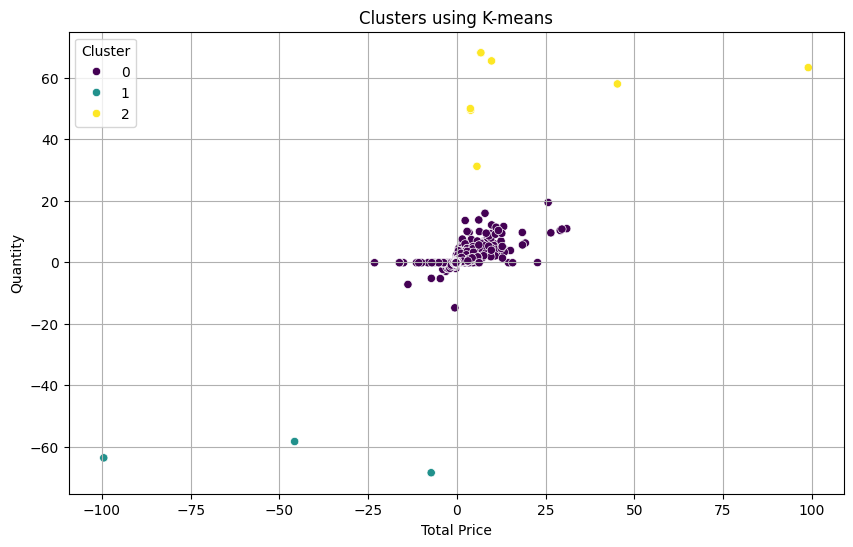

In [28]:
# let's visualize the clusters using k-means k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(invoice_summary_scaled[['TotalPrice', 'Quantity']])
invoice_summary_scaled['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPrice', y='Quantity', data=invoice_summary_scaled, hue='Cluster', palette='viridis')
plt.title('Clusters using K-means')
plt.xlabel('Total Price')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

In [29]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(invoice_summary_scaled[['TotalPrice', 'Quantity']])
labels = dbscan.labels_

# Analyze results
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)
print("Cluster labels:", labels)

Number of clusters: 6
Cluster labels: [0 0 0 ... 0 0 0]


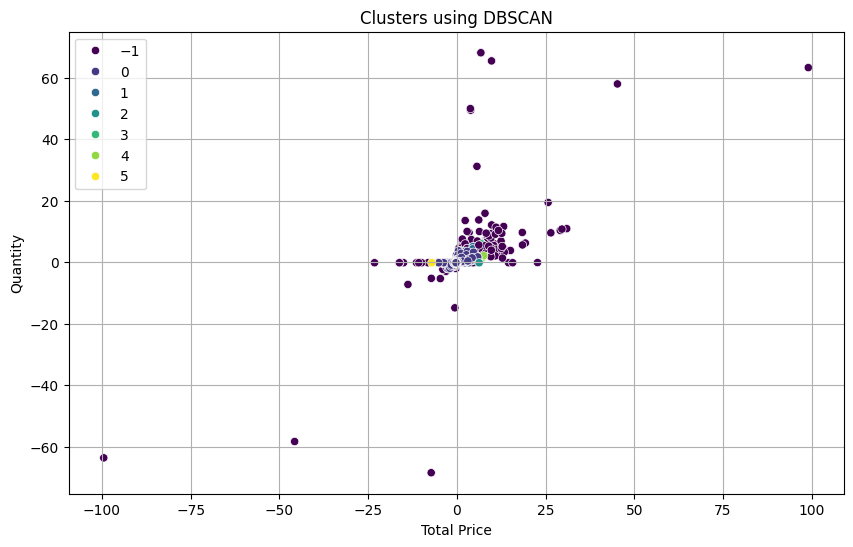

In [31]:
# plot the clusters found from dbscan 

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPrice', y='Quantity', data=invoice_summary_scaled, hue=labels, palette='viridis')
plt.title('Clusters using DBSCAN')
plt.xlabel('Total Price')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()


In [30]:
# let's compare the clustering techniques using the silhouette score
silhouette_kmeans = silhouette_score(invoice_summary_scaled[['TotalPrice', 'Quantity']], kmeans.labels_)
silhouette_dbscan = silhouette_score(invoice_summary_scaled[['TotalPrice', 'Quantity']], labels)

print(f"Silhouette Score K-means: {silhouette_kmeans}")
print(f"Silhouette Score DBSCAN: {silhouette_dbscan}")

print("the silhouette score for k-means is higher than the one for DBSCAN")

Silhouette Score K-means: 0.9928167860216097
Silhouette Score DBSCAN: 0.9248711506587958
the silhouette score for k-means is higher than the one for DBSCAN


### Market Basket Analysis

In [ ]:
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [16]:
# check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [17]:
# we drop the sample for which the description is missing and keep the one with missing customer ID since invoice number is unique given the
prep_df = df.dropna(subset=['Description'])


In [20]:
# check for missing values
missing_values = prep_df.isnull().sum()
print(missing_values)

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    238625
Country             0
dtype: int64


In [22]:
# To mine association rules we just need invoice and StockCode, we can then retrieve the description of the product from the original dataset
prep_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [24]:
# check if for a stockcode we have multiple descriptions
print(prep_df["StockCode"].nunique())
print(prep_df["Description"].nunique())

4950
5698


In [25]:
stockcode_description = prep_df.groupby("StockCode")["Description"].nunique()

In [26]:
stockcode_description[stockcode_description > 1]

StockCode
10080           2
10120           2
10133           2
16008           2
16011           2
               ..
DCGS0068        2
DCGS0069        2
DCGSSBOY        2
DCGSSGIRL       2
gift_0001_20    2
Name: Description, Length: 1232, dtype: int64

For a single stockCode there are multiple description for 1232 times. This imply we have to use description for the transaction encoder input

In [28]:
# we need to map every unique description to a uniquea integer to use the TransactionEncoder, we create a dictionary to do that and use it with map on the dataframe
description_to_int = {desc: idx for idx, desc in enumerate(prep_df['Description'].unique())}
# Replace descriptions with corresponding integers
prep_df['Description'] = prep_df['Description'].map(description_to_int)

In [38]:
prep_df["Description"].nunique()

5698

In [29]:
# Group by 'Invoice' and aggregate 'Description' into lists
transactions = prep_df.groupby('Invoice')['Description'].apply(list)
te = TransactionEncoder()
# Fit TransactionEncoder to the transactions and transform the data into one-hot encoded format
one_hot_encoded = te.fit(transactions).transform(transactions)
# Convert the one-hot encoded format into a DataFrame
basket = pd.DataFrame(one_hot_encoded, columns=te.columns_)

In [50]:
transactions.head()

Invoice
489434                             [0, 1, 2, 3, 4, 5, 6, 7]
489435                                       [8, 9, 10, 11]
489436    [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 2...
489437    [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4...
489438    [53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 6...
Name: Description, dtype: object

In [35]:
prep_df["Invoice"].nunique()

49353

In [42]:
# we double check that we have one line per unique invocienumber and one column for each unique description
print(basket.shape)
print(prep_df["Invoice"].nunique())
print(prep_df["Description"].nunique())


(49353, 5698)
49353
5698



We write a function mine_association_rules takes a dataset basket, minimum support min_support, minimum threshold min_threshold for association rule metrics, and an algorithm choice ('apriori' or 'fpgrowth'). It mines association rules from the dataset using the specified algorithm with the given support and threshold values.

This will help us to do a better analysis using different values for the min_support and min_threshold.

If the algorithm is 'apriori', it uses the Apriori algorithm to generate frequent itemsets from the dataset. If it's 'fpgrowth', it uses the FP-growth algorithm. 

After obtaining frequent itemsets, the function calculates association rules using the confidence metric and the specified minimum threshold. Finally, it returns the generated association rules.

In [68]:

def mine_association_rules(basket, min_support, min_threshold, algorithm='apriori'):
    if algorithm == 'apriori':
        frequent_itemsets = apriori(basket, min_support=min_support, use_colnames=True)
    elif algorithm == 'fpgrowth':
        frequent_itemsets = fpgrowth(basket, min_support=min_support, use_colnames=True)
    else:
        print("Choose apriori or fpgrowth")
    print(f"Generate frequent Itemset using: {algorithm}")
    
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
    return rules

In [72]:
# let's write a function to print the rules
def explain_association_rules(rules):
    print("Number of rules found: ", rules.shape[0])
    print("The 5 first rules are: ")
    display(rules.head())  

In [78]:
# create the inverse dictionary to map the integer to the description
int_to_description = {idx: desc for desc, idx in description_to_int.items()}

In [79]:
# we define different thresholds for the support and confidence
min_support = [0.02, 0.05, 0.1]
min_threshold = [0.5, 0.6, 0.7, 0.8, 0.9]

#### Apriori Algorithm

In [74]:
# rules Apriori
for min_s in min_support:
    for min_t in min_threshold:
        print(f"Support: {min_s}, Threshold: {min_t}")
        rules = mine_association_rules(basket, min_s, min_t, algorithm='apriori')
        # map the integer to the description
        # Map back antecedents and consequents to descriptions
        rules['antecedents'] = rules['antecedents'].apply(lambda x: tuple(int_to_description[desc] for desc in x))
        rules['consequents'] = rules['consequents'].apply(lambda x: tuple(int_to_description[desc] for desc in x))
        explain_association_rules(rules)

Support: 0.02, Threshold: 0.5


Generate frequent Itemset using: apriori
Number of rules found:  7
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(232),(4),0.031467,0.050412,0.022025,0.699936,13.884213,0.020439,3.164613,0.958125
1,(130),(91),0.036371,0.113347,0.025409,0.698607,6.163454,0.021286,2.941853,0.869373
2,(194),(694),0.042470,0.041254,0.022775,0.536260,12.999026,0.021023,2.067420,0.964012
3,(694),(194),0.041254,0.042470,0.022775,0.552063,12.999026,0.021023,2.137645,0.962790
4,(3760),(3759),0.040099,0.044050,0.020404,0.508843,11.551482,0.018638,1.946322,0.951589


Support: 0.02, Threshold: 0.6
Generate frequent Itemset using: apriori
Number of rules found:  4
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(232),(4),0.031467,0.050412,0.022025,0.699936,13.884213,0.020439,3.164613,0.958125
1,(130),(91),0.036371,0.113347,0.025409,0.698607,6.163454,0.021286,2.941853,0.869373
2,(4097),(4099),0.028387,0.029846,0.021154,0.745182,24.967392,0.020306,3.807242,0.987994
3,(4099),(4097),0.029846,0.028387,0.021154,0.708758,24.967392,0.020306,3.336097,0.989480


Support: 0.02, Threshold: 0.7
Generate frequent Itemset using: apriori
Number of rules found:  2
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(4097),(4099),0.028387,0.029846,0.021154,0.745182,24.967392,0.020306,3.807242,0.987994
1,(4099),(4097),0.029846,0.028387,0.021154,0.708758,24.967392,0.020306,3.336097,0.989480


Support: 0.02, Threshold: 0.8
Generate frequent Itemset using: apriori
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.02, Threshold: 0.9
Generate frequent Itemset using: apriori
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.05, Threshold: 0.5
Generate frequent Itemset using: apriori
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.05, Threshold: 0.6
Generate frequent Itemset using: apriori
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.05, Threshold: 0.7
Generate frequent Itemset using: apriori
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.05, Threshold: 0.8
Generate frequent Itemset using: apriori
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.05, Threshold: 0.9
Generate frequent Itemset using: apriori
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.1, Threshold: 0.5
Generate frequent Itemset using: apriori
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.1, Threshold: 0.6
Generate frequent Itemset using: apriori
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.1, Threshold: 0.7
Generate frequent Itemset using: apriori
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.1, Threshold: 0.8
Generate frequent Itemset using: apriori
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.1, Threshold: 0.9
Generate frequent Itemset using: apriori
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


#### FP-Growth Algorithm

In [80]:
# rules Apriori
for min_s in min_support:
    for min_t in min_threshold:
        print(f"Support: {min_s}, Threshold: {min_t}")
        rules = mine_association_rules(basket, min_s, min_t, algorithm='fpgrowth')
        # Map back antecedents and consequents to descriptions
        rules['antecedents'] = rules['antecedents'].apply(lambda x: tuple(int_to_description[desc] for desc in x))
        rules['consequents'] = rules['consequents'].apply(lambda x: tuple(description_to_int[desc] for desc in x))
        explain_association_rules(rules)

Support: 0.02, Threshold: 0.5
Generate frequent Itemset using: fpgrowth
Number of rules found:  7
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(RED HANGING HEART T-LIGHT HOLDER,)","(WHITE HANGING HEART T-LIGHT HOLDER,)",0.036371,0.113347,0.025409,0.698607,6.163454,0.021286,2.941853,0.869373
1,"(SWEETHEART CERAMIC TRINKET BOX,)","(STRAWBERRY CERAMIC TRINKET BOX,)",0.031467,0.050412,0.022025,0.699936,13.884213,0.020439,3.164613,0.958125
2,"(WOODEN FRAME ANTIQUE WHITE ,)","(WOODEN PICTURE FRAME WHITE FINISH,)",0.042470,0.041254,0.022775,0.536260,12.999026,0.021023,2.067420,0.964012
3,"(WOODEN PICTURE FRAME WHITE FINISH,)","(WOODEN FRAME ANTIQUE WHITE ,)",0.041254,0.042470,0.022775,0.552063,12.999026,0.021023,2.137645,0.962790
4,"(HEART OF WICKER LARGE,)","(HEART OF WICKER SMALL,)",0.040099,0.044050,0.020404,0.508843,11.551482,0.018638,1.946322,0.951589


Support: 0.02, Threshold: 0.6
Generate frequent Itemset using: fpgrowth
Number of rules found:  4
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(RED HANGING HEART T-LIGHT HOLDER,)","(WHITE HANGING HEART T-LIGHT HOLDER,)",0.036371,0.113347,0.025409,0.698607,6.163454,0.021286,2.941853,0.869373
1,"(SWEETHEART CERAMIC TRINKET BOX,)","(STRAWBERRY CERAMIC TRINKET BOX,)",0.031467,0.050412,0.022025,0.699936,13.884213,0.020439,3.164613,0.958125
2,"(GREEN REGENCY TEACUP AND SAUCER,)","(ROSES REGENCY TEACUP AND SAUCER ,)",0.028387,0.029846,0.021154,0.745182,24.967392,0.020306,3.807242,0.987994
3,"(ROSES REGENCY TEACUP AND SAUCER ,)","(GREEN REGENCY TEACUP AND SAUCER,)",0.029846,0.028387,0.021154,0.708758,24.967392,0.020306,3.336097,0.989480


Support: 0.02, Threshold: 0.7
Generate frequent Itemset using: fpgrowth
Number of rules found:  2
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(GREEN REGENCY TEACUP AND SAUCER,)","(ROSES REGENCY TEACUP AND SAUCER ,)",0.028387,0.029846,0.021154,0.745182,24.967392,0.020306,3.807242,0.987994
1,"(ROSES REGENCY TEACUP AND SAUCER ,)","(GREEN REGENCY TEACUP AND SAUCER,)",0.029846,0.028387,0.021154,0.708758,24.967392,0.020306,3.336097,0.989480


Support: 0.02, Threshold: 0.8
Generate frequent Itemset using: fpgrowth
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.02, Threshold: 0.9
Generate frequent Itemset using: fpgrowth
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.05, Threshold: 0.5
Generate frequent Itemset using: fpgrowth
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.05, Threshold: 0.6
Generate frequent Itemset using: fpgrowth
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.05, Threshold: 0.7
Generate frequent Itemset using: fpgrowth
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.05, Threshold: 0.8
Generate frequent Itemset using: fpgrowth
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.05, Threshold: 0.9
Generate frequent Itemset using: fpgrowth
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.1, Threshold: 0.5
Generate frequent Itemset using: fpgrowth
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.1, Threshold: 0.6
Generate frequent Itemset using: fpgrowth
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.1, Threshold: 0.7
Generate frequent Itemset using: fpgrowth
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.1, Threshold: 0.8
Generate frequent Itemset using: fpgrowth
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Support: 0.1, Threshold: 0.9
Generate frequent Itemset using: fpgrowth
Number of rules found:  0
The 5 first rules are: 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric



#### Candidate Generation:

Apriori: Generates candidate itemsets by joining frequent itemsets of size 

−
1
k−1. It then prunes infrequent candidate sets based on the Apriori principle.
FP-growth: Does not generate candidate itemsets explicitly. Instead, it constructs an FP-tree to represent the dataset and mines frequent itemsets directly from the tree.
Database Scans:

Apriori: Requires multiple scans of the dataset to count itemset occurrences and determine frequent itemsets. Each scan involves counting the support of candidate itemsets and pruning infrequent ones.
FP-growth: Requires only a single pass over the dataset to construct the FP-tree and mine frequent itemsets. This is because the FP-tree captures the itemset frequencies and relationships efficiently.
Memory Usage:

Apriori: May require a large amount of memory, especially for large datasets or datasets with a high number of unique items, due to the need to store candidate itemsets.
FP-growth: Typically requires less memory compared to Apriori because it does not need to generate candidate itemsets explicitly. Instead, it uses the compact FP-tree data structure.
Performance:

Apriori: While effective, may become inefficient for large datasets or datasets with low minimum support thresholds because it needs to generate a large number of candidate itemsets and perform multiple database scans.
FP-growth: Generally faster and more scalable than Apriori, especially for large datasets or datasets with low minimum support thresholds, due to its single-pass approach and efficient FP-tree data structure.
Algorithm Complexity:

Apriori: The time complexity of Apriori is 
�
(
2
�
)
O(2 
d
 ), where 
�
d is the maximum length of frequent itemsets. It is affected by the number of unique items and the minimum support threshold.
FP-growth: The time complexity of FP-growth is generally lower than Apriori, often closer to 
�
(
�
⋅
�
)
O(n⋅m), where 
�
n is the number of transactions and 
�
m is the number of frequent itemsets.